In [ ]:
!pip install "pandas>=2.0.0"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 83.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 30.9 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.0.3 which is incompatible.


In [ ]:
import sys
import pandas as pd
import numpy as np
import IPython
from IPython.display import display

import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt


# conda install -c anaconda seaborn
import seaborn as sns
sns.set()  # Plot using the seaborn style

print( f"Python {sys.version}" )
print( f"Pandas {pd.__version__}" )
print( f"NumPy {np.__version__}" )
print( f"IPython {IPython.__version__}" )
print( f"Matplotlib {mpl.__version__}" )
print( f"Seaborn {sns.__version__}" )

Python 3.10.12 (main, Jun  7 2023, 12:45:35) [GCC 9.4.0]
Pandas 2.0.3
NumPy 1.22.4
IPython 7.34.0
Matplotlib 3.7.1
Seaborn 0.12.2


In [ ]:
!wget -q https://github.com/google/fonts/raw/main/ofl/sarabun/Sarabun-Regular.ttf
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('Sarabun-Regular.ttf')
mpl.rc('font', family='Sarabun')

!pip install fontTools

# Check the font that matplotlib currently uses
mpl.rcParams['font.family'] #= 'Sarabun'

['Sarabun']

# 1. Clean data

In [ ]:
prepare_df = pd.read_csv("prepare_data_elec.csv")
prepare_df.info()
prepare_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21140 entries, 0 to 21139
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Region                        21140 non-null  object 
 1   Province                      21140 non-null  object 
 2   Group                         21140 non-null  object 
 3   Type_of_electricity_consumer  21140 non-null  object 
 4   Attribute                     21140 non-null  int64  
 5   Value                         17595 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 991.1+ KB


,Region,Province,Group,Type_of_electricity_consumer,Attribute,Value
0,ทั่วราชอาณาจักร,ทั่วราชอาณาจักร,จำนวนการไฟฟ้า,จำนวนการไฟฟ้า,2556,914.0
1,ทั่วราชอาณาจักร,ทั่วราชอาณาจักร,จำนวนการไฟฟ้า,จำนวนการไฟฟ้า,2557,927.0
2,ทั่วราชอาณาจักร,ทั่วราชอาณาจักร,จำนวนการไฟฟ้า,จำนวนการไฟฟ้า,2558,933.0
3,ทั่วราชอาณาจักร,ทั่วราชอาณาจักร,จำนวนการไฟฟ้า,จำนวนการไฟฟ้า,2559,933.0
4,ทั่วราชอาณาจักร,ทั่วราชอาณาจักร,จำนวนการไฟฟ้า,จำนวนการไฟฟ้า,2560,933.0


In [ ]:
#change column name
prepare_df.columns = ['Region','Province','Group','Type','Year','Value']

prepare_df.head()

,Region,Province,Group,Type,Year,Value
0,ทั่วราชอาณาจักร,ทั่วราชอาณาจักร,จำนวนการไฟฟ้า,จำนวนการไฟฟ้า,2556,914.0
1,ทั่วราชอาณาจักร,ทั่วราชอาณาจักร,จำนวนการไฟฟ้า,จำนวนการไฟฟ้า,2557,927.0
2,ทั่วราชอาณาจักร,ทั่วราชอาณาจักร,จำนวนการไฟฟ้า,จำนวนการไฟฟ้า,2558,933.0
3,ทั่วราชอาณาจักร,ทั่วราชอาณาจักร,จำนวนการไฟฟ้า,จำนวนการไฟฟ้า,2559,933.0
4,ทั่วราชอาณาจักร,ทั่วราชอาณาจักร,จำนวนการไฟฟ้า,จำนวนการไฟฟ้า,2560,933.0


In [ ]:
#check duplicated
prepare_df[prepare_df.duplicated()]

,Region,Province,Group,Type,Year,Value


In [ ]:
#check null
prepare_df.isnull().sum()

Region         0
Province       0
Group          0
Type           0
Year           0
Value       3545
dtype: int64

In [ ]:
#fill missing value using "0"
prepare_df = prepare_df.fillna(0)
prepare_df.isnull().sum()

Region      0
Province    0
Group       0
Type        0
Year        0
Value       0
dtype: int64

In [ ]:
#Add column MW
prepare_df['MW'] = (prepare_df['Value']/1000/3600).round(2)
prepare_df

,Region,Province,Group,Type,Year,Value,MW
0,ทั่วราชอาณาจักร,ทั่วราชอาณาจักร,จำนวนการไฟฟ้า,จำนวนการไฟฟ้า,2556,914.0,0.00
1,ทั่วราชอาณาจักร,ทั่วราชอาณาจักร,จำนวนการไฟฟ้า,จำนวนการไฟฟ้า,2557,927.0,0.00
2,ทั่วราชอาณาจักร,ทั่วราชอาณาจักร,จำนวนการไฟฟ้า,จำนวนการไฟฟ้า,2558,933.0,0.00
3,ทั่วราชอาณาจักร,ทั่วราชอาณาจักร,จำนวนการไฟฟ้า,จำนวนการไฟฟ้า,2559,933.0,0.00
4,ทั่วราชอาณาจักร,ทั่วราชอาณาจักร,จำนวนการไฟฟ้า,จำนวนการไฟฟ้า,2560,933.0,0.00
...,...,...,...,...,...,...,...
21135,ภาคกลาง,นนทบุรี,พลังงานไฟฟ้าที่จำหน่ายและใช้ (กิโลวัตต์-ชั่วโมง),ไฟสาธารณะ,2561,86327848.0,23.98
21136,ภาคกลาง,นนทบุรี,พลังงานไฟฟ้าที่จำหน่ายและใช้ (กิโลวัตต์-ชั่วโมง),ไฟสาธารณะ,2562,87753060.0,24.38
21137,ภาคกลาง,นนทบุรี,พลังงานไฟฟ้าที่จำหน่ายและใช้ (กิโลวัตต์-ชั่วโมง),ไฟสาธารณะ,2563,89362592.0,24.82
21138,ภาคกลาง,นนทบุรี,พลังงานไฟฟ้าที่จำหน่ายและใช้ (กิโลวัตต์-ชั่วโมง),ไฟสาธารณะ,2564,89749679.0,24.93


In [ ]:
prepare_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21140 entries, 0 to 21139
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Region    21140 non-null  object 
 1   Province  21140 non-null  object 
 2   Group     21140 non-null  object 
 3   Type      21140 non-null  object 
 4   Year      21140 non-null  int64  
 5   Value     21140 non-null  float64
 6   MW        21140 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 1.1+ MB


In [ ]:
#unique value of region
r = list(prepare_df['Region'].unique())
print(f'ภาคในข้อมูลดิบ : {r}')

#filter region exclude 'ทั่วราชอาณาจักร'
df = prepare_df.query('Region != "ทั่วราชอาณาจักร"')
n_r = list(df['Region'].unique())
print(f'เลือกภาค : {n_r}')

ภาคในข้อมูลดิบ : ['ทั่วราชอาณาจักร', 'ภาคกลาง', 'ภาคเหนือ', 'ภาคตะวันออกเฉียงเหนือ', 'ภาคใต้']
เลือกภาค : ['ภาคกลาง', 'ภาคเหนือ', 'ภาคตะวันออกเฉียงเหนือ', 'ภาคใต้']


In [ ]:
#check provinces
p = 77 #all province is 77.
n = len(list(df['Province'].unique()))
print(f"จังหวัดในประเทศไทย = 77\n\
จำนวนจังหวัดในข้อมูลดิบ = {n}\n\
มีข้อมูลเกินจากจำนวนจังหวัดในประเทศไทย = {n-p}\n")

p = df['Province'].unique()
print(f'รายชื่อจังหวัดในข้อมูลดิบ {p}')

จังหวัดในประเทศไทย = 77
จำนวนจังหวัดในข้อมูลดิบ = 81
มีข้อมูลเกินจากจำนวนจังหวัดในประเทศไทย = 4

รายชื่อจังหวัดในข้อมูลดิบ ['ภาคกลาง' 'ปทุมธานี' 'พระนครศรีอยุธยา' 'อ่างทอง' 'ลพบุรี' 'สิงห์บุรี'
 'ชัยนาท' 'สระบุรี' 'ชลบุรี' 'ระยอง' 'จันทบุรี' 'ตราด' 'ฉะเชิงเทรา'
 'ปราจีนบุรี' 'นครนายก' 'สระแก้ว' 'ราชบุรี' 'กาญจนบุรี' 'สุพรรณบุรี'
 'นครปฐม' 'สมุทรสาคร' 'สมุทรสงคราม' 'เพชรบุรี' 'ประจวบคีรีขันธ์'
 'ภาคเหนือ' 'เชียงใหม่' 'ลำพูน' 'ลำปาง' 'อุตรดิตถ์' 'แพร่' 'น่าน' 'พะเยา'
 'เชียงราย' 'แม่ฮ่องสอน' 'นครสวรรค์' 'อุทัยธานี' 'กำแพงเพชร' 'ตาก'
 'สุโขทัย' 'พิษณุโลก' 'พิจิตร' 'เพชรบูรณ์' 'ภาคตะวันออกเฉียงเหนือ'
 'นครราชสีมา' 'บุรีรัมย์' 'สุรินทร์' 'ศรีสะเกษ' 'อุบลราชธานี' 'ยโสธร'
 'ชัยภูมิ' 'อำนาจเจริญ' 'บึงกาฬ' 'หนองบัวลำภู' 'ขอนแก่น' 'อุดรธานี' 'เลย'
 'หนองคาย' 'มหาสารคาม' 'ร้อยเอ็ด' 'กาฬสินธุ์' 'สกลนคร' 'นครพนม' 'มุกดาหาร'
 'ภาคใต้' 'นครศรีธรรมราช' 'กระบี่' 'พังงา' 'ภูเก็ต' 'สุราษฎร์ธานี' 'ระนอง'
 'ชุมพร' 'สงขลา' 'สตูล' 'ตรัง' 'พัทลุง' 'ปัตตานี' 'ยะลา' 'นราธิวาส'
 'กรุงเทพมหานคร' 'สมุทรปราการ' 'นน

In [ ]:
#filter province exclude 4 regions
region = ['ภาคกลาง', 'ภาคเหนือ', 'ภาคตะวันออกเฉียงเหนือ', 'ภาคใต้']
df = df.query(f"Province not in {region}").copy()
#check province = 77
check = len(df['Province'].unique())
print(f'หลังจากลบ "ภาค" ออกจากรายชื่อจังหวัด : จำนวนจังหวัด = {check}')

หลังจากลบ "ภาค" ออกจากรายชื่อจังหวัด : จำนวนจังหวัด = 77


In [ ]:
#unique value of Group
g = list(df['Group'].unique())
print(f'Group : {g}')

#filter Group exclude 'จำนวนการไฟฟ้า'
df = df.query('Group != "จำนวนการไฟฟ้า"')
new_g = list(df['Group'].unique())
print(f'Group : {new_g}')


Group : ['จำนวนการไฟฟ้า', 'จำนวนผู้ใช้ไฟฟ้า (ราย)', 'พลังงานไฟฟ้าที่จำหน่ายและใช้ (กิโลวัตต์-ชั่วโมง)']
Group : ['จำนวนผู้ใช้ไฟฟ้า (ราย)', 'พลังงานไฟฟ้าที่จำหน่ายและใช้ (กิโลวัตต์-ชั่วโมง)']


In [ ]:
#unique value of Type
t = list(df['Type'].unique())
print(f'ประเภทผู้ใช้ไฟฟ้า : {len(t)} รายการ\n')
t

ประเภทผู้ใช้ไฟฟ้า : 19 รายการ



['รวม จำนวนผู้ใช้ไฟฟ้า (ราย)',
 'บ้านอยู่อาศัย (น้อยกว่า 150 กิโลวัตต์-ชั่วโมงต่อเดือน)',
 'บ้านอยู่อาศัย (150 และมากกว่า กิโลวัตต์-ชั่วโมงต่อเดือน)',
 'กิจการขนาดเล็ก',
 'กิจการขนาดกลาง',
 'กิจการขนาดใหญ่',
 'กิจการเฉพาะอย่าง',
 'องค์กรที่ไม่แสวงหากำไร',
 'สูบน้ำเพื่อการเกษตร',
 'ไฟชั่วคราว',
 'ไฟสำรอง',
 'ไฟที่สามารถงดจ่ายไฟฟ้าได้',
 'สถานีอัดประจุไฟฟ้า',
 'รวม พลังงานไฟฟ้าที่จำหน่ายและใช้ (กิโลวัตต์-ชั่วโมง)',
 'รวม พลังงานไฟฟ้าที่ใช้',
 'รวม พลังงานไฟฟ้าที่จำหน่าย',
 'บ้านอยู่อาศัย',
 'ส่วนราชการและองค์กรที่ไม่แสวงหากำไร',
 'ไฟสาธารณะ']

In [ ]:
#filter Type exclude 'รวม%'
total = ['รวม จำนวนผู้ใช้ไฟฟ้า (ราย)','รวม พลังงานไฟฟ้าที่จำหน่ายและใช้ (กิโลวัตต์-ชั่วโมง)', 'รวม พลังงานไฟฟ้าที่ใช้', 'รวม พลังงานไฟฟ้าที่จำหน่าย']
df = df.query(f'Type not in {total}')
new_t = list(df['Type'].unique())

print(f'ไม่เลือกรายการ "รวม" เหลือประเภทผู้ใช้ไฟฟ้า : {len(new_t)} รายการ\n')
new_t

ไม่เลือกรายการ "รวม" เหลือประเภทผู้ใช้ไฟฟ้า : 15 รายการ



['บ้านอยู่อาศัย (น้อยกว่า 150 กิโลวัตต์-ชั่วโมงต่อเดือน)',
 'บ้านอยู่อาศัย (150 และมากกว่า กิโลวัตต์-ชั่วโมงต่อเดือน)',
 'กิจการขนาดเล็ก',
 'กิจการขนาดกลาง',
 'กิจการขนาดใหญ่',
 'กิจการเฉพาะอย่าง',
 'องค์กรที่ไม่แสวงหากำไร',
 'สูบน้ำเพื่อการเกษตร',
 'ไฟชั่วคราว',
 'ไฟสำรอง',
 'ไฟที่สามารถงดจ่ายไฟฟ้าได้',
 'สถานีอัดประจุไฟฟ้า',
 'บ้านอยู่อาศัย',
 'ส่วนราชการและองค์กรที่ไม่แสวงหากำไร',
 'ไฟสาธารณะ']

In [ ]:
#replace 'บ้านอยู่อาศัย (น้อยกว่า 150 กิโลวัตต์-ชั่วโมงต่อเดือน)' ,'บ้านอยู่อาศัย (150 และมากกว่า กิโลวัตต์-ชั่วโมงต่อเดือน)'  => 'บ้านอยู่อาศัย'

df = df.replace('บ้านอยู่อาศัย (น้อยกว่า 150 กิโลวัตต์-ชั่วโมงต่อเดือน)', 'บ้านอยู่อาศัย')
df = df.replace('บ้านอยู่อาศัย (150 และมากกว่า กิโลวัตต์-ชั่วโมงต่อเดือน)', 'บ้านอยู่อาศัย')
res = list(df['Type'].unique())
print(f'รวมประเภท "บ้านอาศัย" ประเภทผู้ใช้ไฟฟ้า : {len(res)} รายการ\n')
res

รวมประเภท "บ้านอาศัย" ประเภทผู้ใช้ไฟฟ้า : 13 รายการ



['บ้านอยู่อาศัย',
 'กิจการขนาดเล็ก',
 'กิจการขนาดกลาง',
 'กิจการขนาดใหญ่',
 'กิจการเฉพาะอย่าง',
 'องค์กรที่ไม่แสวงหากำไร',
 'สูบน้ำเพื่อการเกษตร',
 'ไฟชั่วคราว',
 'ไฟสำรอง',
 'ไฟที่สามารถงดจ่ายไฟฟ้าได้',
 'สถานีอัดประจุไฟฟ้า',
 'ส่วนราชการและองค์กรที่ไม่แสวงหากำไร',
 'ไฟสาธารณะ']

In [ ]:
#change type "Year" int to string
df.Year = df.Year.astype('str')
df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17500 entries, 540 to 21139
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Region    17500 non-null  object 
 1   Province  17500 non-null  object 
 2   Group     17500 non-null  object 
 3   Type      17500 non-null  object 
 4   Year      17500 non-null  object 
 5   Value     17500 non-null  float64
 6   MW        17500 non-null  float64
dtypes: float64(2), object(5)
memory usage: 1.1+ MB


In [ ]:
#Group : ['จำนวนผู้ใช้ไฟฟ้า (ราย)', 'พลังงานไฟฟ้าที่จำหน่ายและใช้ (กิโลวัตต์-ชั่วโมง)']

print('-----------df-consumer------------')
consumer = df[df['Group'] == 'จำนวนผู้ใช้ไฟฟ้า (ราย)']
consumer.info()
print(f'\nshape {consumer.shape}')

print('\n--------------df-mw--------------')
mw = df[df['Group'] == 'พลังงานไฟฟ้าที่จำหน่ายและใช้ (กิโลวัตต์-ชั่วโมง)']
mw.info()
print(f'\nshape {mw.shape}')

-----------df-consumer------------
<class 'pandas.core.frame.DataFrame'>
Index: 8735 entries, 540 to 21034
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Region    8735 non-null   object 
 1   Province  8735 non-null   object 
 2   Group     8735 non-null   object 
 3   Type      8735 non-null   object 
 4   Year      8735 non-null   object 
 5   Value     8735 non-null   float64
 6   MW        8735 non-null   float64
dtypes: float64(2), object(5)
memory usage: 545.9+ KB

shape (8735, 7)

--------------df-mw--------------
<class 'pandas.core.frame.DataFrame'>
Index: 8765 entries, 665 to 21139
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Region    8765 non-null   object 
 1   Province  8765 non-null   object 
 2   Group     8765 non-null   object 
 3   Type      8765 non-null   object 
 4   Year      8765 non-null   object 
 5   Value     8765 non-nul

In [ ]:
#select 9 Type
select_consumer = ['กิจการขนาดกลาง', 'กิจการขนาดเล็ก', 'กิจการขนาดใหญ่',
                  'กิจการเฉพาะอย่าง', 'บ้านอยู่อาศัย','ส่วนราชการและองค์กรที่ไม่แสวงหากำไร',
                   'สูบน้ำเพื่อการเกษตร','ไฟชั่วคราว','สถานีอัดประจุไฟฟ้า']

#2. Plot

2.1 กราฟแสดงภาพรวมปริมาณการใช้ไฟฟ้าในแต่ละปี แบ่งตามภาค

In [ ]:
#kwh group all_region
all_region_mk = mw.groupby(['Region','Year'])[['MW']].agg(['sum']).reset_index()
all_region_mk.columns = ['Region','Year','MW']

#change type "Year" int to string
all_region_mk.Year = all_region_mk.Year.astype('str')
all_region_mk.dtypes

all_region_mk.info()
all_region_mk.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Region  40 non-null     object 
 1   Year    40 non-null     object 
 2   MW      40 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.1+ KB


,Region,Year,MW
0,ภาคกลาง,2556,32428.36
1,ภาคกลาง,2557,33051.26
2,ภาคกลาง,2558,34147.18
3,ภาคกลาง,2559,35520.98
4,ภาคกลาง,2560,35920.64


In [ ]:
# pivot()
# - 'index' refers to the column whose unique values will be used as row index
# - 'columns' refers to the column whose unique values will be used as column index
# - 'values' refers to the column whose values will be used to fill in the DataFrame
df_mw = all_region_mk.pivot(index = 'Year',columns='Region', values='MW')

print('=== After pivot() ===')
df_mw = df_mw.reset_index()
display(df_mw)
#print('Row:', df1.index)
#print('Column:', df1.columns)

=== After pivot() ===


Region,Year,ภาคกลาง,ภาคตะวันออกเฉียงเหนือ,ภาคเหนือ,ภาคใต้
0,2556,32428.36,4646.41,3596.47,3927.70
1,2557,33051.26,4908.55,3728.88,4060.66
2,2558,34147.18,5174.47,3921.20,4178.80
3,2559,35520.98,5520.28,4089.84,4478.74
4,2560,35920.64,5742.87,4157.44,4544.82
5,2561,36270.24,5783.60,4246.62,4681.43
6,2562,37013.05,6116.17,4476.12,4787.17
7,2563,35511.35,6157.11,4510.63,4518.28
8,2564,36190.13,6427.20,4570.86,4466.48
9,2565,37642.41,6455.95,4675.86,4693.83


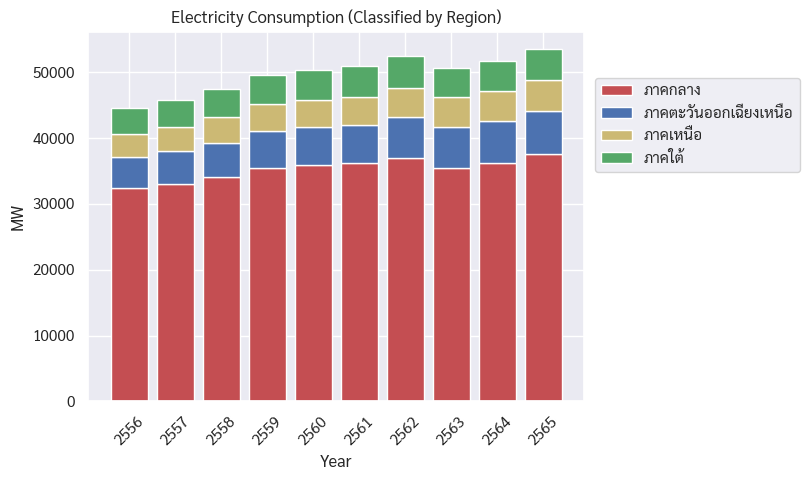

In [ ]:
#barWidth = 10
#fig = plt.subplots(figsize =(12, 8))
year = df_mw['Year'].unique()
#set data
x = df_mw['Year']
y1 = df_mw['ภาคกลาง']
y2 = df_mw['ภาคตะวันออกเฉียงเหนือ']
y3 = df_mw['ภาคเหนือ']
y4 = df_mw['ภาคใต้']


# plot bars in stack manner
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.bar(x, y3, bottom=y1+y2, color='y')
plt.bar(x, y4, bottom=y1+y2+y3, color='g')


plt.title("Electricity Consumption (Classified by Region)")
plt.xlabel('Year')
plt.ylabel("MW")
plt.xticks(x, year, rotation=45)

plt.legend(["ภาคกลาง", "ภาคตะวันออกเฉียงเหนือ", "ภาคเหนือ", "ภาคใต้"], loc='lower right', bbox_to_anchor=(1.45, 0.6))
plt.show()

2.2 กราฟแสดงภาพรวมปริมาณผู้ใช้ไฟฟ้าในแต่ละปี แบ่งตามภาค

In [ ]:
#kwh all_region
all_region_consumer = consumer.groupby(['Region','Year'])[['Value']].agg(['sum']).reset_index()
all_region_consumer.columns = ['Region','Year','Value']
all_region_consumer['Million'] = (all_region_consumer['Value']/1000000).round(2)
all_region_consumer.info()
all_region_consumer.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Region   40 non-null     object 
 1   Year     40 non-null     object 
 2   Value    40 non-null     float64
 3   Million  40 non-null     float64
dtypes: float64(2), object(2)
memory usage: 1.4+ KB


,Region,Year,Value,Million
0,ภาคกลาง,2556,8107521.0,8.11
1,ภาคกลาง,2557,8390343.0,8.39
2,ภาคกลาง,2558,8692789.0,8.69
3,ภาคกลาง,2559,8982367.0,8.98
4,ภาคกลาง,2560,9207396.0,9.21


In [ ]:
# pivot()
# - 'index' refers to the column whose unique values will be used as row index
# - 'columns' refers to the column whose unique values will be used as column index
# - 'values' refers to the column whose values will be used to fill in the DataFrame
df_con = all_region_consumer.pivot(index = 'Year',columns='Region', values='Million')

print('=== After pivot() ===')
df_con = df_con.reset_index()
display(df_con)

=== After pivot() ===


Region,Year,ภาคกลาง,ภาคตะวันออกเฉียงเหนือ,ภาคเหนือ,ภาคใต้
0,2556,8.11,5.79,3.75,2.80
1,2557,8.39,5.95,3.85,2.89
2,2558,8.69,6.09,3.94,2.97
3,2559,8.98,6.24,4.04,3.04
4,2560,9.21,6.39,4.13,3.10
5,2561,9.46,6.53,4.19,3.15
6,2562,9.71,6.67,4.27,3.21
7,2563,10.02,6.85,4.37,3.28
8,2564,10.25,7.03,4.46,3.36
9,2565,10.45,7.17,4.53,3.42


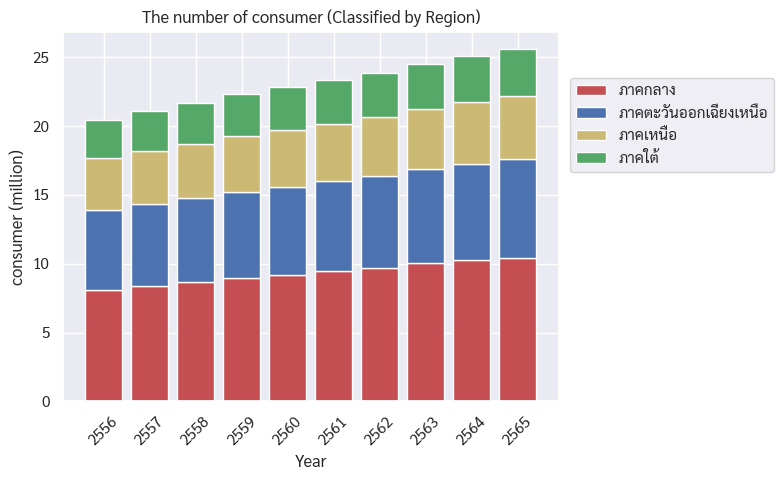

In [ ]:
year = df_con['Year'].unique()
#set data
x2 = df_con['Year']
z1 = df_con['ภาคกลาง']
z2 = df_con['ภาคตะวันออกเฉียงเหนือ']
z3 = df_con['ภาคเหนือ']
z4 = df_con['ภาคใต้']

# plot bars in stack manner
plt.bar(x2, z1, color='r')
plt.bar(x2, z2, bottom=z1, color='b')
plt.bar(x2, z3, bottom=z1+z2, color='y')
plt.bar(x2, z4, bottom=z1+z2+z3, color='g')

plt.title("The number of consumer (Classified by Region)")
plt.xlabel('Year')
plt.ylabel("consumer (million)")
plt.xticks(x2, year, rotation=45)
plt.legend(["ภาคกลาง", "ภาคตะวันออกเฉียงเหนือ", "ภาคเหนือ", "ภาคใต้"], loc='lower right', bbox_to_anchor=(1.45, 0.6))
plt.show()

2.3 กราฟแสดงปริมาณการใช้ไฟฟ้า โดยเลือกประเภทผู้ใช้ 9 ประเภท

In [ ]:
elec_all_group_mw = mw.groupby(['Region','Type','Year'])[['MW']].agg(['sum']).reset_index()
elec_all_group_mw.columns = ['Region','Type','Year','MW']

#change type "Year" int to object
#elec_all_group_kwh.Year = elec_all_group_kwh.Year.astype('object')
#elec_all_group_kwh.dtypes

elec_all_group_mw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Region  440 non-null    object 
 1   Type    440 non-null    object 
 2   Year    440 non-null    object 
 3   MW      440 non-null    float64
dtypes: float64(1), object(3)
memory usage: 13.9+ KB


In [ ]:
l = elec_all_group_mw['Type'].unique()
print(l,'\n')
print(f'รายการประเภทผู้ใช้ทุกประเภท = {len(l)}\n')

['กิจการขนาดกลาง' 'กิจการขนาดเล็ก' 'กิจการขนาดใหญ่' 'กิจการเฉพาะอย่าง'
 'บ้านอยู่อาศัย' 'สถานีอัดประจุไฟฟ้า' 'สูบน้ำเพื่อการเกษตร'
 'ส่วนราชการและองค์กรที่ไม่แสวงหากำไร' 'องค์กรที่ไม่แสวงหากำไร'
 'ไฟชั่วคราว' 'ไฟที่สามารถงดจ่ายไฟฟ้าได้' 'ไฟสาธารณะ' 'ไฟสำรอง'] 

รายการประเภทผู้ใช้ทุกประเภท = 13



In [ ]:
print(f'เลือก 9 ประเภท\n')
df_elec_all_group_mw = elec_all_group_mw.query(f"Type in {select_consumer}").copy()
nl = df_elec_all_group_mw['Type'].unique()
print(nl)

เลือก 9 ประเภท

['กิจการขนาดกลาง' 'กิจการขนาดเล็ก' 'กิจการขนาดใหญ่' 'กิจการเฉพาะอย่าง'
 'บ้านอยู่อาศัย' 'สถานีอัดประจุไฟฟ้า' 'สูบน้ำเพื่อการเกษตร'
 'ส่วนราชการและองค์กรที่ไม่แสวงหากำไร' 'ไฟชั่วคราว']


In [ ]:
df_elec_all_group_mw

,Region,Type,Year,MW
0,ภาคกลาง,กิจการขนาดกลาง,2556,5427.02
1,ภาคกลาง,กิจการขนาดกลาง,2557,5549.37
2,ภาคกลาง,กิจการขนาดกลาง,2558,5726.22
3,ภาคกลาง,กิจการขนาดกลาง,2559,5802.56
4,ภาคกลาง,กิจการขนาดกลาง,2560,5831.63
...,...,...,...,...
415,ภาคใต้,ไฟชั่วคราว,2561,47.60
416,ภาคใต้,ไฟชั่วคราว,2562,50.87
417,ภาคใต้,ไฟชั่วคราว,2563,43.05
418,ภาคใต้,ไฟชั่วคราว,2564,37.91


In [ ]:
#แต่ละประเภท มีการใช้ไฟฟ้า ในทุกภาคหรือไม่
aa = df_elec_all_group_mw[['Type','Region']]
aa.drop_duplicates(inplace = True)

check = aa['Type'].value_counts().reset_index()
check.columns = ['Type','count_region']
check

<ipython-input-31-9aa1a6f4a6be>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aa.drop_duplicates(inplace = True)


,Type,count_region
0,กิจการขนาดกลาง,4
1,กิจการขนาดเล็ก,4
2,กิจการขนาดใหญ่,4
3,กิจการเฉพาะอย่าง,4
4,บ้านอยู่อาศัย,4
5,สถานีอัดประจุไฟฟ้า,4
6,สูบน้ำเพื่อการเกษตร,4
7,ไฟชั่วคราว,4
8,ส่วนราชการและองค์กรที่ไม่แสวงหากำไร,1


In [ ]:
#แต่ละประเภทมีข้อมูลการใช้ไฟฟ้าในทุกปี (10 ปี) หรือไม่
bb = df_elec_all_group_mw[['Type','Year']]
#bb = bb.groupby(['Type','Year'])
check2 = bb['Type'].value_counts().reset_index()
check2.columns = ['Type','count_year']
check2

,Type,count_year
0,กิจการขนาดกลาง,40
1,กิจการขนาดเล็ก,40
2,กิจการขนาดใหญ่,40
3,กิจการเฉพาะอย่าง,40
4,บ้านอยู่อาศัย,40
5,สูบน้ำเพื่อการเกษตร,40
6,ไฟชั่วคราว,40
7,สถานีอัดประจุไฟฟ้า,20
8,ส่วนราชการและองค์กรที่ไม่แสวงหากำไร,10


In [ ]:
# สถานีอัดประจุไฟฟ้า มีการใช้ไฟฟ้าในปีใดบ้าง
bbb = bb[bb['Type'] == 'สถานีอัดประจุไฟฟ้า']
bbb['Year'].unique()

array(['2561', '2562', '2563', '2564', '2565'], dtype=object)

In [ ]:
#Add year 2556-2560 'สถานีอัดประจุไฟฟ้า'
new_rows = []
for year in range(2556, 2561):
    new_rows.append({'Region':'ภาคกลาง,','Type': 'สถานีอัดประจุไฟฟ้า', 'Year': year, 'MW': 0})
add_year = pd.DataFrame(new_rows)
add_year = pd.concat([df_elec_all_group_mw, add_year], ignore_index=True)
add_year

,Region,Type,Year,MW
0,ภาคกลาง,กิจการขนาดกลาง,2556,5427.02
1,ภาคกลาง,กิจการขนาดกลาง,2557,5549.37
2,ภาคกลาง,กิจการขนาดกลาง,2558,5726.22
3,ภาคกลาง,กิจการขนาดกลาง,2559,5802.56
4,ภาคกลาง,กิจการขนาดกลาง,2560,5831.63
...,...,...,...,...
310,"ภาคกลาง,",สถานีอัดประจุไฟฟ้า,2556,0.00
311,"ภาคกลาง,",สถานีอัดประจุไฟฟ้า,2557,0.00
312,"ภาคกลาง,",สถานีอัดประจุไฟฟ้า,2558,0.00
313,"ภาคกลาง,",สถานีอัดประจุไฟฟ้า,2559,0.00


In [ ]:
add_year.Year = add_year.Year.astype('str')
add_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Region  315 non-null    object 
 1   Type    315 non-null    object 
 2   Year    315 non-null    object 
 3   MW      315 non-null    float64
dtypes: float64(1), object(3)
memory usage: 10.0+ KB


In [ ]:
aa[aa['Type'] == 'ส่วนราชการและองค์กรที่ไม่แสวงหากำไร']

,Type,Region
65,ส่วนราชการและองค์กรที่ไม่แสวงหากำไร,ภาคกลาง


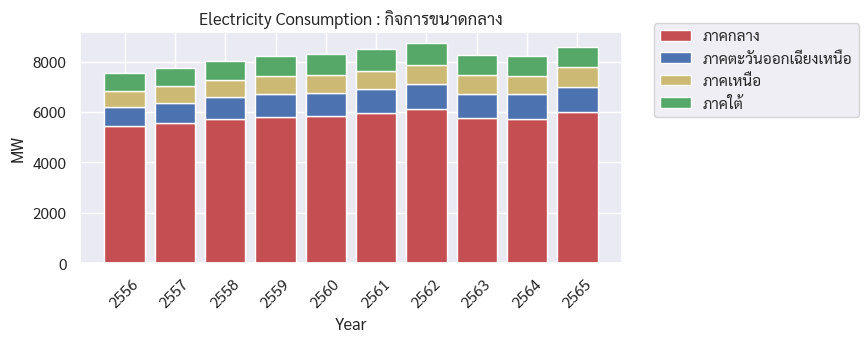

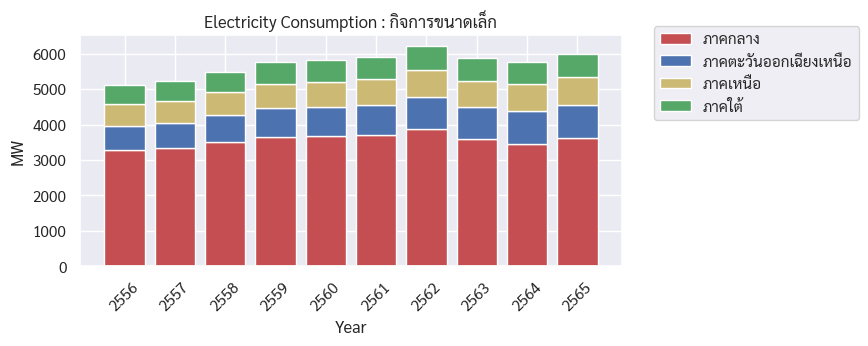

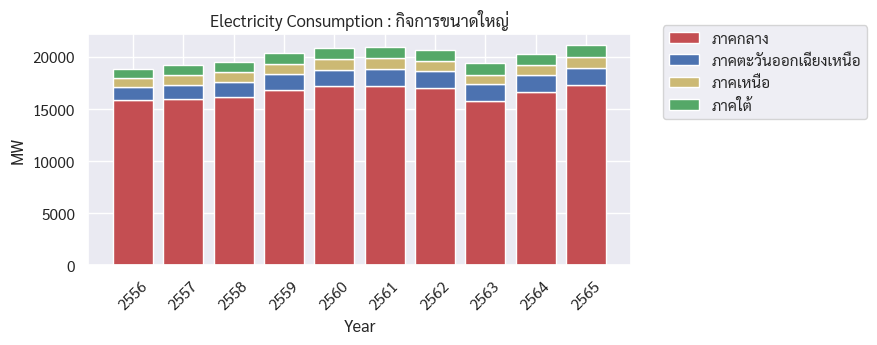

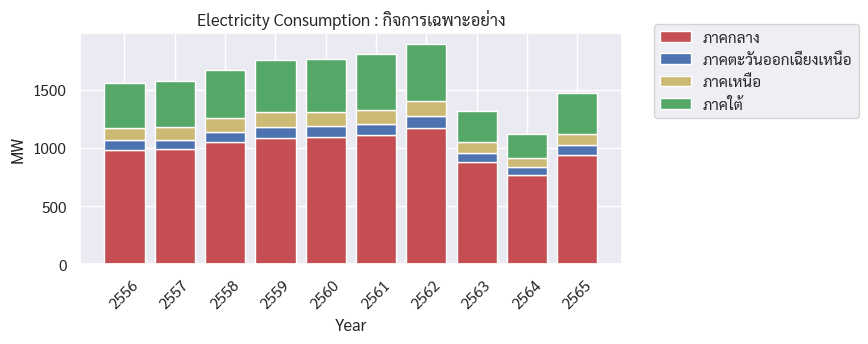

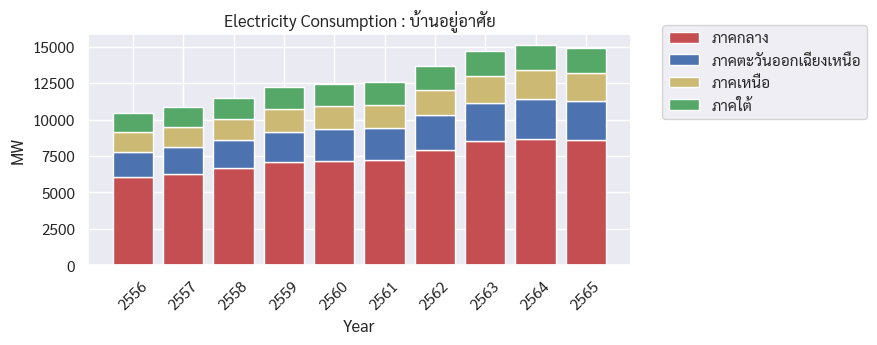

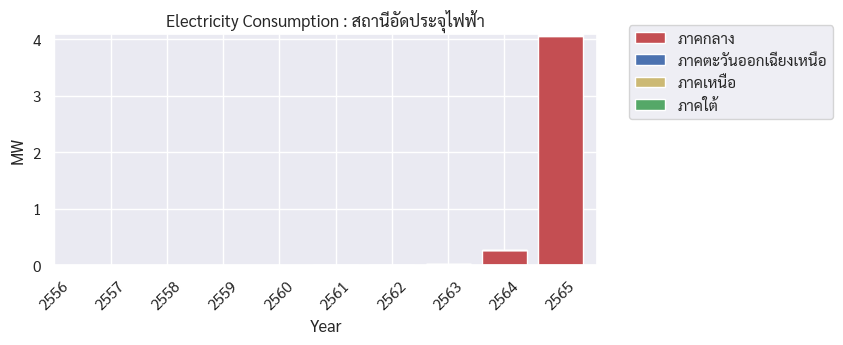

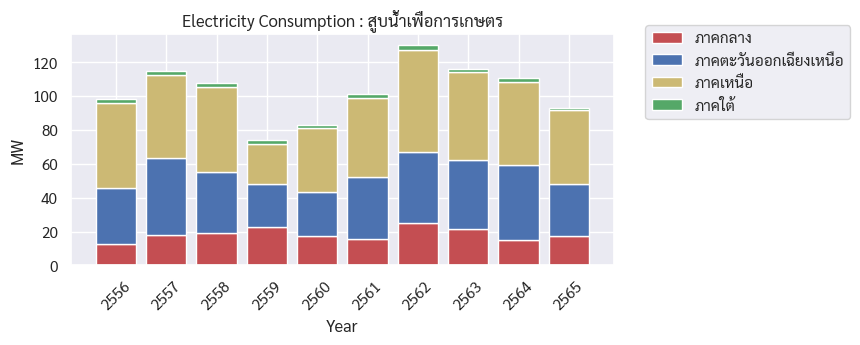

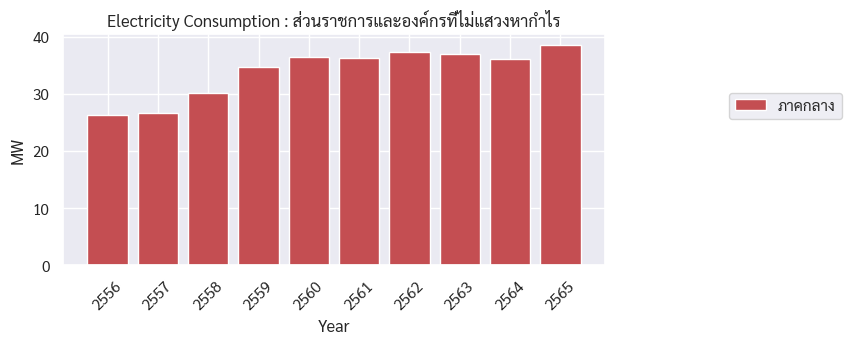

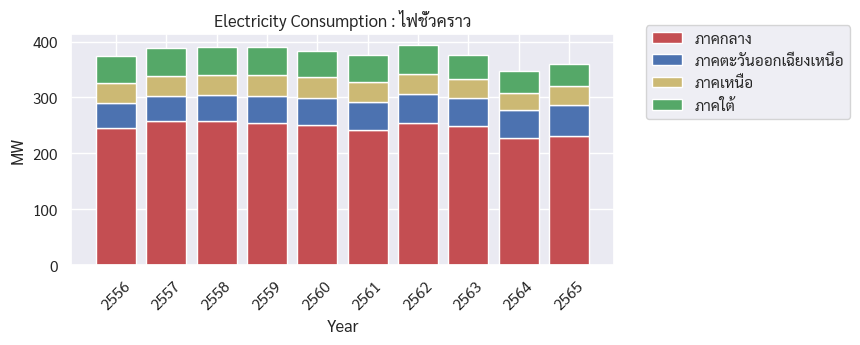

In [ ]:
typ = df_elec_all_group_mw['Type'].unique()
year = df_elec_all_group_mw['Year'].unique()
#fig, axes = plt.subplots(3, 3, figsize=(18, 10), sharey=True)
#fig.suptitle('Electricity Consumption 9  types')

for i in range(len(typ)):
  fig = plt.subplots(figsize =(7, 3))
  t_kwh = add_year[add_year['Type'] == typ[i]]

  pivot0 = t_kwh.pivot(index = 'Year',columns='Region', values='MW')
  pivot0 = pivot0.reset_index()
  #change type "Year" int to object
  #pivot0.Year = pivot0.Year.astype('int')
  #elec_all_group_kwh.dtypes

  if typ[i] == 'ส่วนราชการและองค์กรที่ไม่แสวงหากำไร' :
      x3 = pivot0['Year']
      a1 = pivot0['ภาคกลาง']
      plt.bar(x3, a1, color='r')

      # Adding Xticks
      #plt.xlabel('Year', fontweight ='bold', fontsize = 15)
      #plt.ylabel('MW', fontweight ='bold', fontsize = 15)

      plt.title(f"Electricity Consumption : {typ[i]}")
      plt.xlabel('Year')
      plt.ylabel("MW")
      plt.xticks(x3, year, rotation=45)
      plt.legend(["ภาคกลาง", "ภาคตะวันออกเฉียงเหนือ", "ภาคเหนือ", "ภาคใต้"], loc='lower right', bbox_to_anchor=(1.45, 0.6))
      plt.show()
      print(f'\n')

  else:

      #set data
      x3 = pivot0['Year']
      a1 = pivot0['ภาคกลาง']
      a2 = pivot0['ภาคตะวันออกเฉียงเหนือ']
      a3 = pivot0['ภาคเหนือ']
      a4 = pivot0['ภาคใต้']

      # plot bars in stack manner
      plt.bar(x3, a1, color='r')
      plt.bar(x3, a2, bottom=a1, color='b')
      plt.bar(x3, a3, bottom=a1+a2, color='y')
      plt.bar(x3, a4, bottom=a1+a2+a3, color='g')

      plt.title(f"Electricity Consumption : {typ[i]}")
      plt.xlabel('Year')
      plt.ylabel("MW")
      plt.xticks(x3, year, rotation=45)
      #if typ[i] == 'สถานีอัดประจุไฟฟ้า':
        #plt.xticks(x3, ['2561','2562','2563','2564','2565'], rotation=45)
      #else:
        #plt.xticks(x3, year, rotation=45)
      plt.legend(["ภาคกลาง", "ภาคตะวันออกเฉียงเหนือ", "ภาคเหนือ", "ภาคใต้"], loc='lower right', bbox_to_anchor=(1.45, 0.6))

      plt.show()
      print(f'\n')

      y = pivot0['Year'].unique()
      # Adding Xticks
      #plt.xlabel('Year', fontweight ='bold', fontsize = 15)
      #plt.ylabel('KWh', fontweight ='bold', fontsize = 15)


2.4 กราฟแสดงปริมาณการใช้ไฟฟ้าสูงสุด 5 จังหวัด
โดยเลือกจากประเภทผู้ใช้ 9 ประเภท และเลือกเฉพาะภาคกลาง

In [ ]:
#เลือกเฉพาะภาคกลาง
df_central = mw.query(f"(Region == 'ภาคกลาง') and (Type in {select_consumer})").copy()
df_central = df_central.groupby(['Province','Type','Year'])['MW'].agg(['sum']).reset_index()
df_central.columns = ['Province','Type','Year','MW']
df_central

,Province,Type,Year,MW
0,กรุงเทพมหานคร,กิจการขนาดกลาง,2556,1766.24
1,กรุงเทพมหานคร,กิจการขนาดกลาง,2557,1754.98
2,กรุงเทพมหานคร,กิจการขนาดกลาง,2558,1794.22
3,กรุงเทพมหานคร,กิจการขนาดกลาง,2559,1781.06
4,กรุงเทพมหานคร,กิจการขนาดกลาง,2560,1756.74
...,...,...,...,...
1945,เพชรบุรี,ไฟชั่วคราว,2561,2.38
1946,เพชรบุรี,ไฟชั่วคราว,2562,2.62
1947,เพชรบุรี,ไฟชั่วคราว,2563,2.10
1948,เพชรบุรี,ไฟชั่วคราว,2564,1.91


In [ ]:
#เลือก 5 จังหวัดที่มีปริมาณการใช้ไฟฟ้ารวมสูงสุด (9 ประเภทผู้ใช้)
top5 = df_central.groupby(['Province'])['MW'].agg('sum').reset_index()
top5 = top5.sort_values('MW', ascending = False)
top5 = top5.iloc[:5]
display(top5)

lst_top5 = list(top5['Province'])
print(f'\n{lst_top5}')

,Province,MW
0,กรุงเทพมหานคร,97931.81
4,ชลบุรี,33308.57
14,ระยอง,27919.55
17,สมุทรปราการ,27403.18
19,สมุทรสาคร,22186.47



['กรุงเทพมหานคร', 'ชลบุรี', 'ระยอง', 'สมุทรปราการ', 'สมุทรสาคร']


<ipython-input-40-e3d1c2c731f5>:10: UserWarning: The palette list has more values (26) than needed (5), which may not be intended.
  sns.relplot( kind='line',


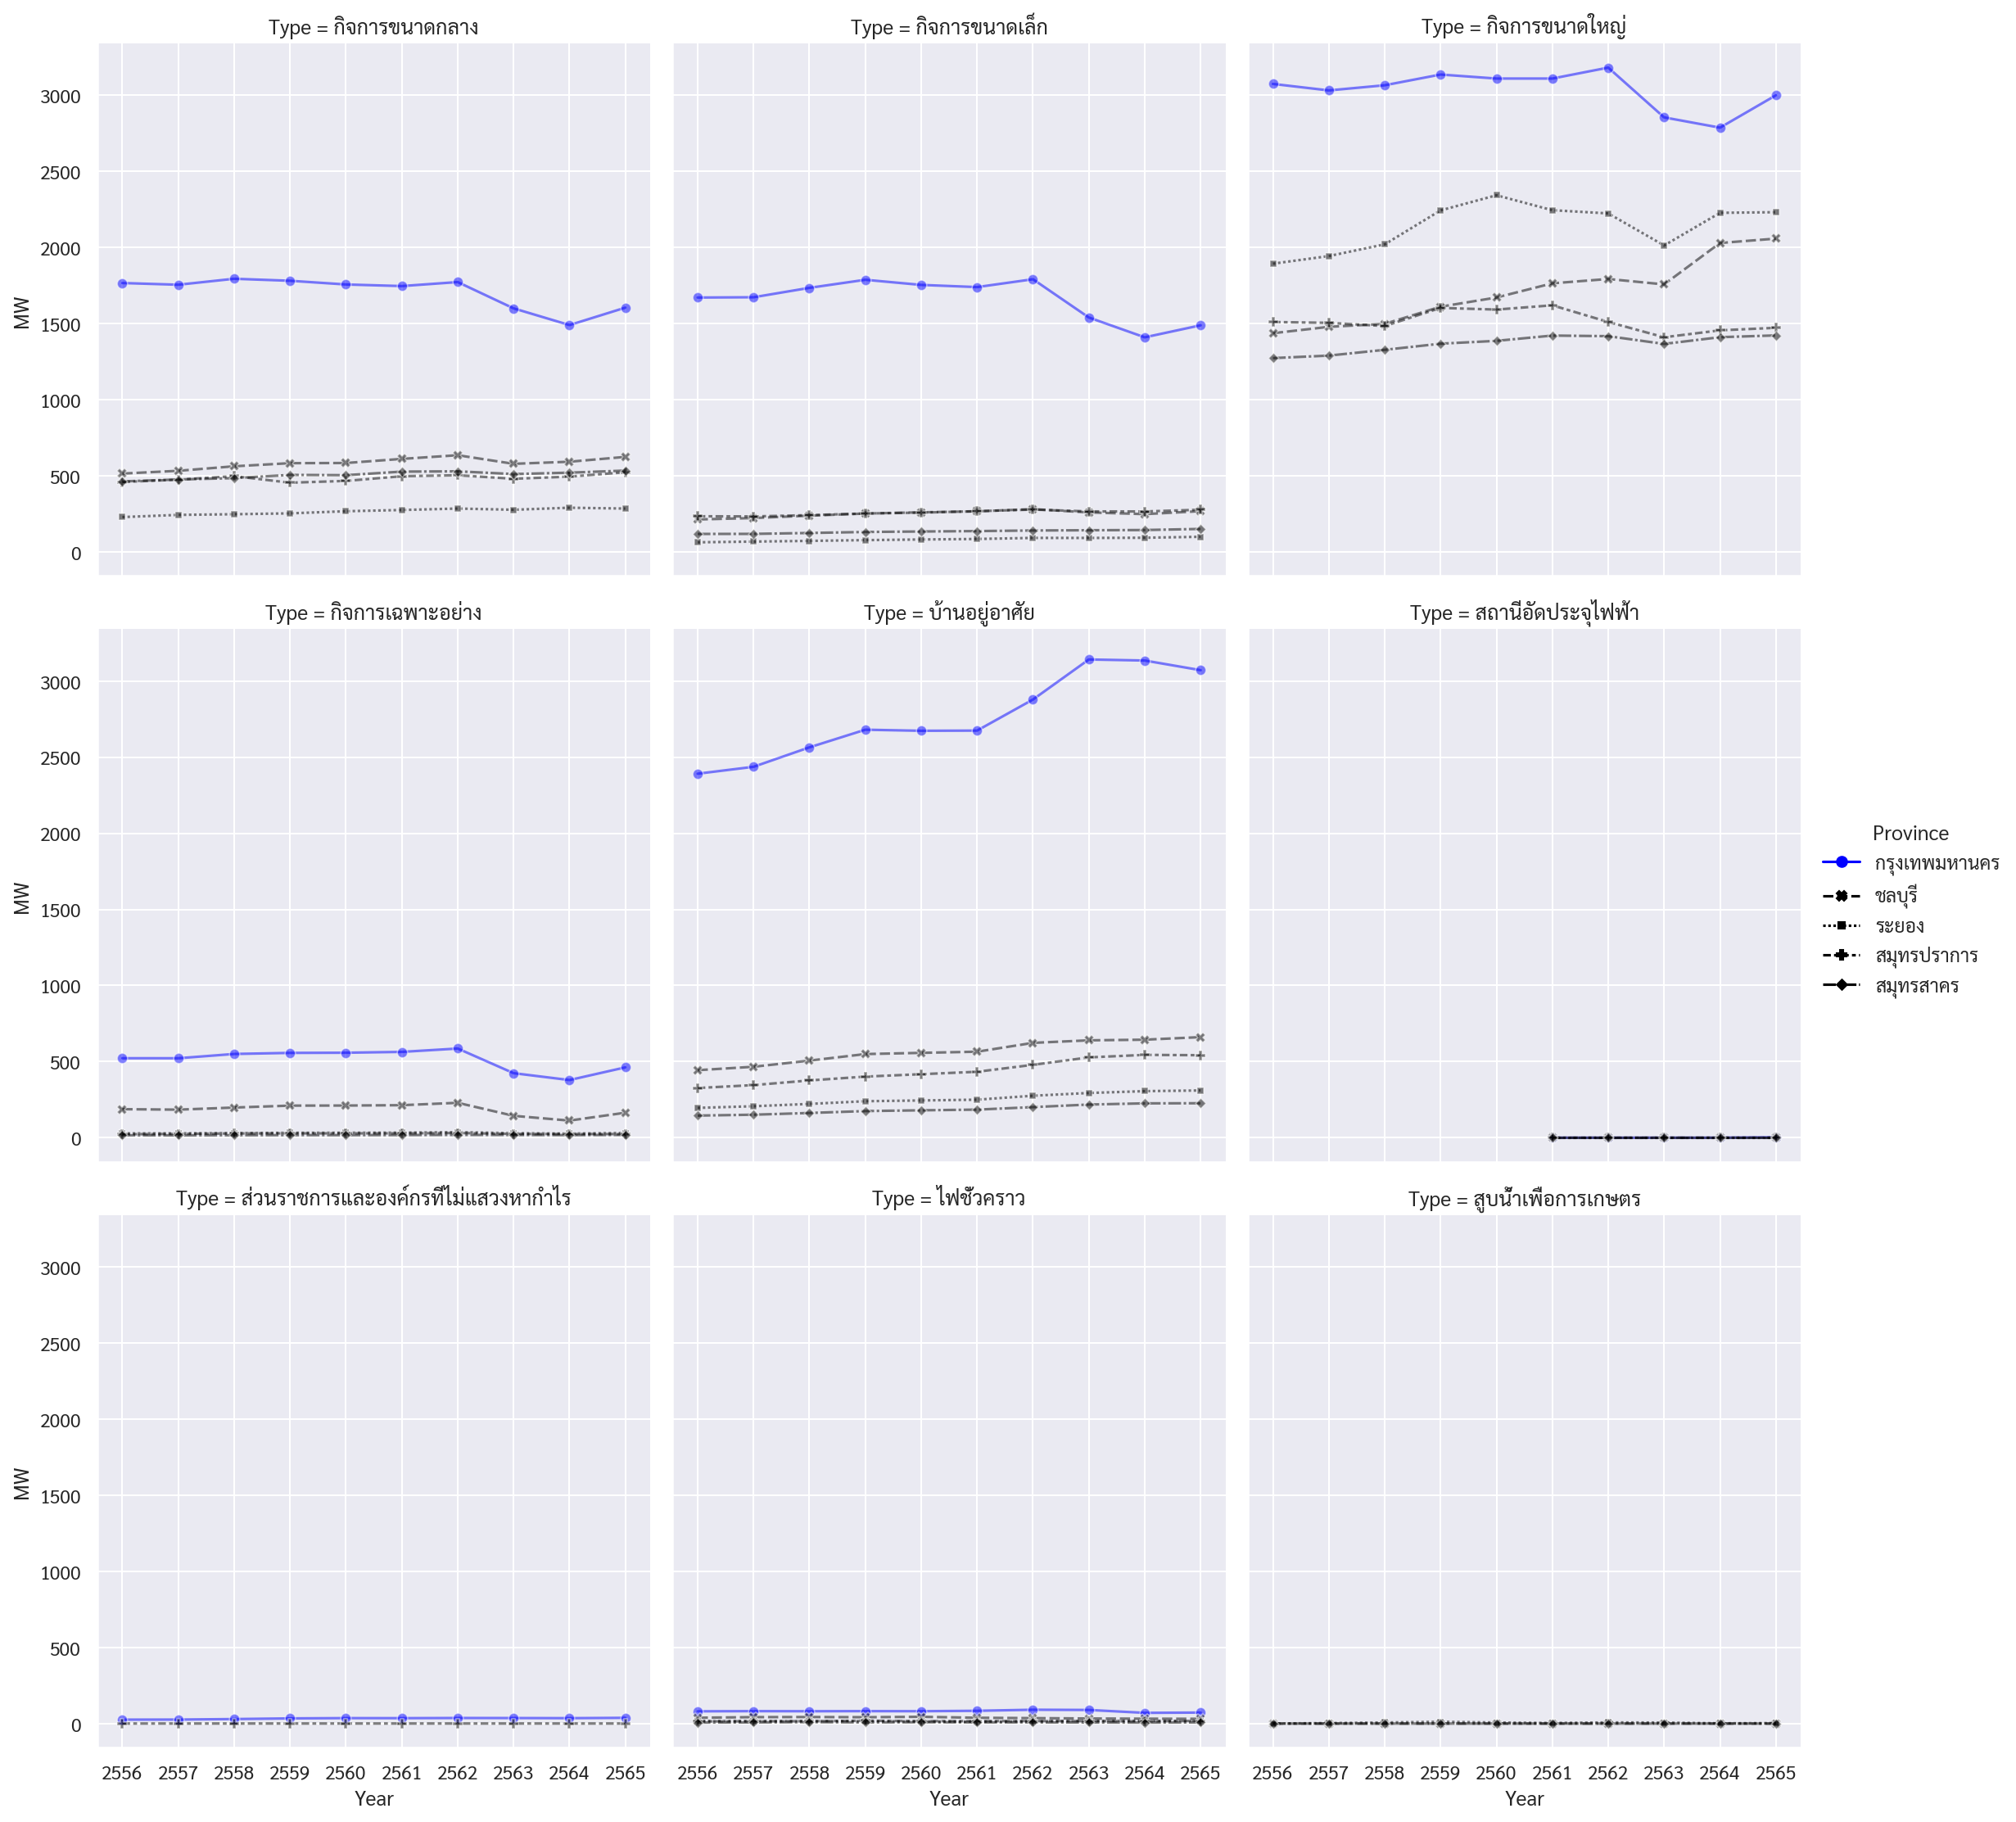

In [ ]:
top = df_central.query(f"Province in {lst_top5}").copy()

top['Type'] = top['Type'].astype(str)

my_palette = ['black'] * df_central.Province.nunique()

my_palette[0] = 'blue'

sns.set(rc={'figure.dpi':150},font='Sarabun')
sns.relplot( kind='line',
             data=top,
             x='Year', y='MW',
             hue='Province',
             col='Type',   # Facet the visualization
             style='Province',
             markers=True,
             col_wrap=3,
             height=5, aspect=1.0,
             alpha=0.5,
             palette=my_palette
          );

2.5 กราฟแสดงปริมาณการใช้ไฟฟ้าโดยเลือกเฉพาะ สถานีอัดประจุไฟฟ้า

In [ ]:
#KWh
bkk = df_central.query(f"(Type == 'สถานีอัดประจุไฟฟ้า')").copy()
e = bkk.groupby(['Province','Year'])['MW'].sum().reset_index()
e = e[e['MW'] > 0]
new_e = e.sort_values(['Year','MW','Province'],ascending = [True,False,True])

#change type "Year" int to object
new_e.Year = new_e.Year.astype('object')
new_e.dtypes
new_e


,Province,Year,MW
0,กรุงเทพมหานคร,2561,0.01
1,กรุงเทพมหานคร,2562,0.01
2,กรุงเทพมหานคร,2563,0.02
3,กรุงเทพมหานคร,2564,0.12
48,นนทบุรี,2564,0.12
88,สมุทรปราการ,2564,0.04
4,กรุงเทพมหานคร,2565,2.92
49,นนทบุรี,2565,0.78
89,สมุทรปราการ,2565,0.29
9,กาญจนบุรี,2565,0.02


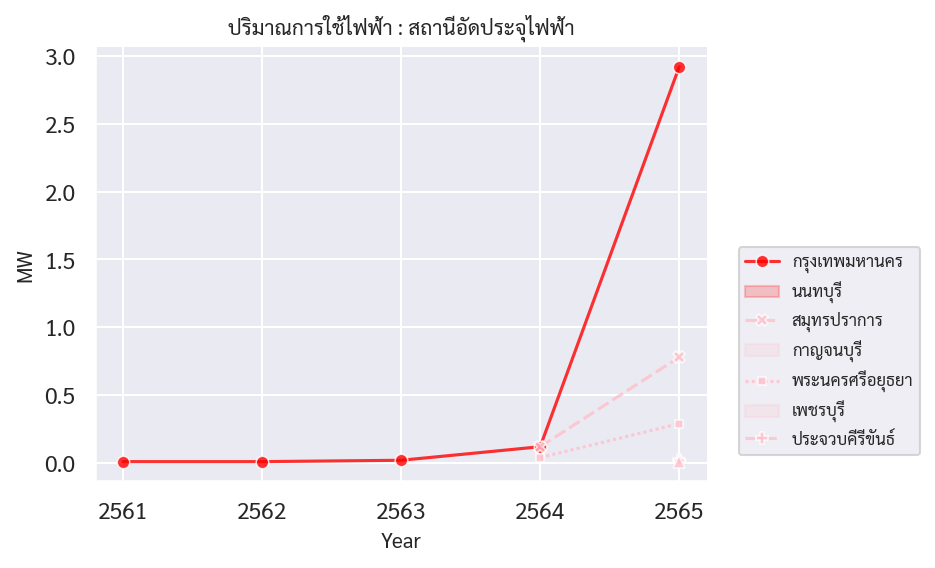

In [ ]:
#KWh
#bkk = df_central.query(f"(Type == 'สถานีอัดประจุไฟฟ้า')").copy()

new_e['Province'] = new_e['Province'].astype(str)

my_palette = ['pink'] * new_e.Province.nunique()
my_palette[0] = 'red'

#sns.set(rc={'figure.dpi':150},font='Sarabun')

g = sns.relplot( kind='line',
             data=new_e,
             x='Year', y='MW',
             hue='Province',
             style='Province',
             markers=True,
             alpha=0.8,
             palette=my_palette,
              legend = None,

          );

plt.title(f'ปริมาณการใช้ไฟฟ้า : สถานีอัดประจุไฟฟ้า',fontsize = 10)
plt.xlabel('Year', fontweight ='bold', fontsize = 10)
plt.ylabel('MW', fontweight ='bold', fontsize = 10)
plt.legend(new_e['Province'].unique(),loc='center', bbox_to_anchor=(1.2, 0.3),fontsize = 8)
g.fig.set_figheight(3.5)
plt.show()